# Aviachipta narxi bo'yicha Regression Model

Ustunlar tarkibi:

- "ID": Ketma - ketlik uchun qo'yilgan sonlar.

- "Airline": Parvoz qilingan aviakompaniya nomi.

- "Flight": Parvoz qilingan ID raqami.

- "Source_city": Parvoz qaysi shahardan boshlanishi.

- "Departure_time": Samolyotning ketish vaqti.

- "Stop": Parvoz davomida to'xtashlar soni.

- "Arrival_time": Qaytish vaqti.

- "Destination_city": Qaysi davlatga parvoz qilinayotgani.

- "Class": Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.

- "Duration": Parvoz davomiyligi.

- "Days_left": Samolyotning qancha vaqtdan keyin qaytishi

- "Price": Avia qatnov bo'yicha narxi

# Machine Learning uchun CRISP_DM Loyiha qadamlari:

1-QADAM : BIZNESNI (FAOLIYAT) O'RGANISH

    1-bosqich: Jarayonni tushunish:

         a. Buyurtmachi - "Best Fly India" MChJ.
            Buyurtma - DataFrame Aviakompaniya aviaqatnov narxlari bo'yicha so'rovini o'z ichiga oladi. Aviaqatnovning kelajakdagi narxini bashorat qiluvchi Regression Model qurish
            Mavjud DataSet - /kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv
    
         b. Buyurtmachi orqali suhbat:
            Biz yaratgan Regression Model, modelimizning chiqishi boshqa kattaroq modelning kirishiga ulanadi;
            Biz to'plagan DataSet ichidagi hozirgi narxi, avvalda qatnovda ishtirok etgan insonlar bo'yicha yi'g'ilgan baza hosil bo'lgan narx bo'yicha;
            Mavjud usulning ya'ni Modelimiz orqali emas, balki ekspertlar chiqargan natija aniqligi qanday? 20%
    
    2-bosqich: Analitik yondashuvni aniqlash:

        a. Qaysi Machine Learning turini qo'llaymiz? - Supervised, chunki bizga Label qismi mavjud
        b. Muammoning turi (Algorithm) qanday? - Regression Model 
        c. Usul? - Offline
        d. Modelimiz aniqligini qanday aniqlaymiz? MSE, RMSE va boshqalar

2-QADAM : MA'LUMOTLARNI O'RGANISH

    3-bosqich: Ma'lumotlarga qo'yilgan talablar

    4-bosqich: Ma'lumotlarni yig'ish
    
    5-bosqich: Ma'lumotlarni talqin qilish

In [184]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization by plot
%matplotlib inline
import seaborn as sns # data visualization
import sklearn # machine learning algorithms

# kerakli kutubxonalarni o'rnatamiz

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv


# **2-QADAM : MA'LUMOTLARNI O'RGANISH (Exploring Data)**

    3-bosqich: Ma'lumotlarga qo'yilgan talablar

    4-bosqich: Ma'lumotlarni yig'ish
    
    5-bosqich: Ma'lumotlarni talqin qilish

In [185]:
df_train = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv")
df_test = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv")

# kerakli dataframes'ni yuklab olamiz

In [186]:
df_train.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [187]:
df_test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [188]:
print(f"Train Dataframe'ning qator soni-{df_train.shape[0]} ta va ustunlari soni-{df_train.shape[1]} ta")
print(f"Train Dataframe'ning qator soni-{df_test.shape[0]} ta va ustunlari soni-{df_test.shape[1]} ta")

# dataframe ichidagi qator va ustunlarini aniqlash

Train Dataframe'ning qator soni-20000 ta va ustunlari soni-12 ta
Train Dataframe'ning qator soni-5000 ta va ustunlari soni-11 ta


In [189]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [190]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

# null qiymatlar soni

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64


In [191]:
airlane = df_train["airline"].unique()
flight = df_train["flight"].unique()
source_city = df_train["source_city"].unique()
departure_time = df_train["departure_time"].unique()
stops = df_train["stops"].unique()
arrival_time = df_train["arrival_time"].unique()
destination_city = df_train["destination_city"].unique()
class_type = df_train["class"].unique()

# takrorlanmagan elementlarni aniqlash
# buning sababi, biz qo'lda Machine leraning algoritmisiz elementlarni Category turidan Integer turiga o'tkazamiz

In [192]:
print(f"airlane ustuni ichida - {airlane} qiymatlar mavjud")
print(f"flight ustuni ichida - {flight} qiymatlar mavjud")
print(f"source_city ustuni ichida - {source_city} qiymatlar mavjud")
print(f"departure_time ustuni ichida - {departure_time} qiymatlar mavjud")
print(f"stops ustuni ichida - {stops} qiymatlar mavjud")
print(f"arrival_time ustuni ichida - {arrival_time} qiymatlar mavjud")
print(f"destination_city ustuni ichida - {destination_city} qiymatlar mavjud")
print(f"class_type ustuni ichida - {class_type} qiymatlar mavjud")

airlane ustuni ichida - ['Vistara' 'SpiceJet' 'Indigo' 'Air_India' 'GO_FIRST' 'AirAsia'] qiymatlar mavjud
flight ustuni ichida - ['UK-810' 'SG-5094' 'UK-846' ... 'AI-489' 'G8-213' '6E-7201'] qiymatlar mavjud
source_city ustuni ichida - ['Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Delhi' 'Mumbai'] qiymatlar mavjud
departure_time ustuni ichida - ['Early_Morning' 'Evening' 'Morning' 'Afternoon' 'Night' 'Late_Night'] qiymatlar mavjud
stops ustuni ichida - ['one' 'zero' 'two_or_more'] qiymatlar mavjud
arrival_time ustuni ichida - ['Night' 'Evening' 'Morning' 'Afternoon' 'Early_Morning' 'Late_Night'] qiymatlar mavjud
destination_city ustuni ichida - ['Mumbai' 'Kolkata' 'Delhi' 'Hyderabad' 'Chennai' 'Bangalore'] qiymatlar mavjud
class_type ustuni ichida - ['Economy' 'Business'] qiymatlar mavjud


In [193]:
# yuqoridagi natijadan ko'rinib turibdiki: "stop" va "class_type" ustuniga o'zgartirish kiritish mumkin

df_train["stops"] = df_train["stops"].replace({
    "zero" : 1,
    "one" : 1,
    "two_or_more" : 2
    })

df_train["class"] = df_train["class"].replace({
    "Economy" : 0,
    "Business" : 1,
    })

df_train.sample(5)

<ipython-input-193-fc60ec5e3878>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["stops"] = df_train["stops"].replace({
<ipython-input-193-fc60ec5e3878>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["class"] = df_train["class"].replace({


,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
8847,8848,Vistara,UK-727,Delhi,Night,1,Night,Kolkata,0,2.25,28,4000
13809,13810,Vistara,UK-863,Mumbai,Morning,1,Night,Delhi,0,13.33,45,6122
15819,15820,Air_India,AI-840,Hyderabad,Night,1,Afternoon,Kolkata,0,17.67,28,5314
7808,7809,Vistara,UK-816,Bangalore,Morning,1,Night,Kolkata,1,11.25,21,60508
3687,3688,Air_India,AI-424,Kolkata,Afternoon,1,Night,Bangalore,0,30.58,20,7053


In [194]:
airlane = df_test["airline"].unique()
flight = df_test["flight"].unique()
source_city = df_test["source_city"].unique()
departure_time = df_test["departure_time"].unique()
stops = df_test["stops"].unique()
arrival_time = df_test["arrival_time"].unique()
destination_city = df_test["destination_city"].unique()
class_type = df_test["class"].unique()

# takrorlanmagan elementlarni aniqlash
# buning sababi, biz qo'lda Machine leraning algoritmisiz elementlarni Category turidan Integer turiga o'tkazamiz

In [195]:
# yuqoridagi natijadan ko'rinib turibdiki: "stop" va "class_type" ustuniga o'zgartirish kiritish mumkin

df_test["stops"] = df_test["stops"].replace({
    "zero" : 1,
    "one" : 1,
    "two_or_more" : 2
    })

df_test["class"] = df_test["class"].replace({
    "Economy" : 0,
    "Business" : 1,
    })

df_test.sample(5)

<ipython-input-195-1d579622a1b2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["stops"] = df_test["stops"].replace({
<ipython-input-195-1d579622a1b2>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["class"] = df_test["class"].replace({


,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
2033,2034,Vistara,UK-772,Kolkata,Morning,1,Afternoon,Mumbai,1,2.58,23
4161,4162,Vistara,UK-899,Delhi,Afternoon,1,Evening,Bangalore,0,4.75,48
1739,1740,Air_India,AI-9643,Delhi,Evening,1,Afternoon,Bangalore,0,17.83,31
197,198,Vistara,UK-899,Delhi,Afternoon,2,Morning,Kolkata,0,18.92,11
3100,3101,Vistara,UK-933,Delhi,Afternoon,1,Night,Bangalore,1,5.42,10


In [196]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  int64  
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  int64  
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1.8+ MB


In [197]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['airline', 'source_city', 'destination_city', 'class', "departure_time"]:
    label_encoded = LabelEncoder()
    
    df_train[column] = label_encoded.fit_transform(df_train[column])
    df_test[column] = label_encoded.transform(df_test[column])
    label_encoders[column] = label_encoded

# Categorical Columns Labelencoder orqali float ko'rinishiga olindi

In [198]:
df_train = df_train.drop(columns = ['stops' , 'arrival_time'])

In [199]:
df_train = df_train.drop(columns = ["flight"])

In [200]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  int64  
 2   source_city       20000 non-null  int64  
 3   departure_time    20000 non-null  int64  
 4   destination_city  20000 non-null  int64  
 5   class             20000 non-null  int64  
 6   duration          20000 non-null  float64
 7   days_left         20000 non-null  int64  
 8   price             20000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.4 MB


In [201]:
df_train.describe()

,id,airline,source_city,departure_time,destination_city,class,duration,days_left,price
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,3.11290,2.579000,2.424850,2.58345,0.312350,12.177627,25.924150,20960.281700
std,5773.647028,1.83017,1.754341,1.755166,1.74582,0.463463,7.157944,13.624874,22775.459535
min,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.830000,1.000000,1105.000000
25%,5000.750000,1.00000,1.000000,1.000000,1.00000,0.000000,6.830000,14.000000,4783.000000
50%,10000.500000,3.00000,2.000000,2.000000,3.00000,0.000000,11.250000,26.000000,7425.000000
75%,15000.250000,5.00000,4.000000,4.000000,4.00000,1.000000,16.080000,38.000000,42521.000000
max,20000.000000,5.00000,5.000000,5.000000,5.00000,1.000000,38.580000,49.000000,114523.000000


## Data visualization before making Regression Model

In [202]:
correlation = df_train.corr().sort_values(by = "price", ascending = False)
correlation

# Price uchun muhim bo'lgan bog'liq ustunlar

,id,airline,source_city,departure_time,destination_city,class,duration,days_left,price
price,-0.002443,0.241193,0.013570,0.058520,0.008747,0.937868,0.213158,-0.102545,1.000000
class,0.000039,0.174770,0.007379,0.057410,0.002545,1.000000,0.144831,-0.022332,0.937868
airline,0.003641,1.000000,-0.017651,0.050009,-0.035735,0.174770,-0.008702,-0.024465,0.241193
duration,-0.000458,-0.008702,0.006542,0.091432,0.012434,0.144831,1.000000,-0.020091,0.213158
departure_time,-0.009564,0.050009,-0.006443,1.000000,0.011299,0.057410,0.091432,0.006627,0.058520
source_city,0.005421,-0.017651,1.000000,-0.006443,-0.231524,0.007379,0.006542,-0.003307,0.013570
destination_city,-0.002801,-0.035735,-0.231524,0.011299,1.000000,0.002545,0.012434,-0.011963,0.008747
id,1.000000,0.003641,0.005421,-0.009564,-0.002801,0.000039,-0.000458,0.003195,-0.002443
days_left,0.003195,-0.024465,-0.003307,0.006627,-0.011963,-0.022332,-0.020091,1.000000,-0.102545


In [203]:
correlation["price"]

# Price uchun muhim bo'lgan bog'liq ustunlar

price               1.000000
class               0.937868
airline             0.241193
duration            0.213158
departure_time      0.058520
source_city         0.013570
destination_city    0.008747
id                 -0.002443
days_left          -0.102545
Name: price, dtype: float64

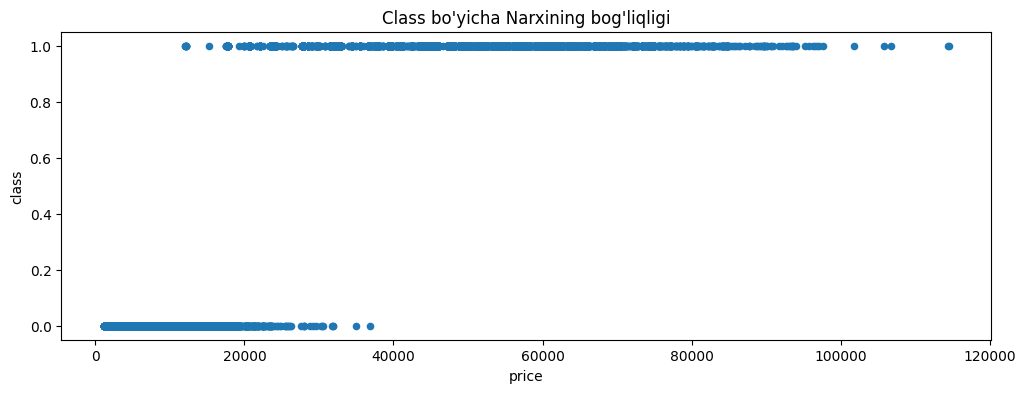

In [204]:
df_train.plot(
    kind = "scatter",
    x = "price",
    y = "class",
    title = "Class bo'yicha Narxining bog'liqligi",
    figsize = (12, 4)
)
plt.show()

# demak Business Class uchun ko'proq mijozlar mavjud ekan

# **3-QADAM: MA'LUMOTLARNI TAYYORLASH**

In [205]:
X = df_train.drop(columns = ['id' ,"price"])
y = df_train['price']

# X-paramet va y-label ajratish

In [206]:
print(f"Parametr yoki Input qismi: {X}")
print(f"Label qismi: {y}")

# dataset X-parametr va y-label ajratildi

Parametr yoki Input qismi:        airline  source_city  departure_time  destination_city  class  \
0            5            0               1                 5      0   
1            4            3               2                 4      0   
2            5            0               4                 2      1   
3            5            4               4                 3      0   
4            3            1               1                 5      0   
...        ...          ...             ...               ...    ...   
19995        3            0               5                 5      0   
19996        0            4               4                 2      0   
19997        5            1               1                 0      0   
19998        5            5               2                 0      0   
19999        5            4               2                 1      0   

       duration  days_left  
0         14.25         21  
1          1.75          7  
2          9.58      

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

# train_set va test_set ajratildi

In [208]:
print(
    f"Umumiy Parametr hajmi: {X.shape}\n"
    )
print(
    f"Umumiy  Label hajmi: {y.shape}\n"
    )
print(
    f"X-parametrlar uchun\n"
        f"Train set o'lchovi: {X_train.shape} va\n"
        f"Test set o'lchovi: {X_test.shape}\n"
    )
print(
    f"y-Label uchun\n"
        f"Train set o'lchovi: {y_train.shape} va\n"
        f"Test set o'lchovi: {y_test.shape}\n"
    )

Umumiy Parametr hajmi: (20000, 7)

Umumiy  Label hajmi: (20000,)

X-parametrlar uchun
Train set o'lchovi: (15000, 7) va
Test set o'lchovi: (5000, 7)

y-Label uchun
Train set o'lchovi: (15000,) va
Test set o'lchovi: (5000,)



# **4-QADAM: MODELLASH**

In [209]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regression_model = RandomForestRegressor( n_estimators = 100, random_state = 42)
random_forest_regression_model.fit(X_train, y_train)

# RandomForestRegressor Classification Supervised Machine Learning Model

RandomForestRegressor(random_state=42)

In [210]:
y_prediction = random_forest_regression_model.predict(X_test)

# X_test nisbatan bashorat qilish

In [211]:
print(y_test.shape, y_prediction.shape)

(5000,) (5000,)


# **5-QADAM: MODELNI BAHOLASH**

In [212]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_mse = mean_squared_error(y_test, y_prediction)
test_mae = mean_absolute_error(y_test, y_prediction)


print(f"Mean_squared_error of the training data: {np.sqrt(test_mse)} xatolikda bashorat qilyapti")
print(f"Mean_absolute_error of the training data: {test_mae} xatolikda bashorat qilyapti")

# modelimizni tekshirish

Mean_squared_error of the training data: 4029.776150138984 xatolikda bashorat qilyapti
Mean_absolute_error of the training data: 2191.694144671429 xatolikda bashorat qilyapti


In [213]:
from sklearn.metrics import r2_score

# R² hisoblash
r2 = r2_score(y_test, y_prediction)
print(f"R^2 (foiz): {r2 * 100}% aniqlikda ishlamoqda")

R^2 (foiz): 96.80470546663965% aniqlikda ishlamoqda


# **Submission**

In [214]:
ids = df_test['id'].values
X_test = df_test.drop("id", axis=1).values

In [290]:
submission = pd.DataFrame({
    'id': ids,
    'price' : y_prediction.reshape(-1),
})

In [292]:
submission.sample(10)

,id,price
567,568,2177.86
1336,1337,54088.00
1756,1757,33232.18
3180,3181,5998.27
3220,3221,11711.01
4611,4612,3089.10
4250,4251,9625.51
1713,1714,10209.51
2456,2457,5586.62
2188,2189,5264.52


In [294]:
submission.to_csv("Flight Price - Regression Model.csv", index = False)